# Training a decision tree model on cleaned data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [3]:
df=pd.read_csv("dataset\AER_credit_card_data_cleaned.csv")
df.head()

,card,reports,age,yearly_income,monthly_card_expenditure,owner_of_house,selfemp,dependents,months_in_current_address,majorcards,active_credit_accounts
0,1,0,37,45199,124,1,0,2,54,1,12
1,1,0,33,24200,9,0,0,2,34,1,13
2,1,0,33,45000,15,1,0,3,58,1,5
3,1,0,30,25400,137,0,0,0,25,1,7
4,1,0,32,97867,546,1,0,1,64,1,5


In [4]:
df.columns

Index(['card', 'reports', 'age', 'yearly_income', 'monthly_card_expenditure',
       'owner_of_house', 'selfemp', 'dependents', 'months_in_current_address',
       'majorcards', 'active_credit_accounts'],
      dtype='object')

In [5]:
x=df.drop("card",axis=1)
x.head()

,reports,age,yearly_income,monthly_card_expenditure,owner_of_house,selfemp,dependents,months_in_current_address,majorcards,active_credit_accounts
0,0,37,45199,124,1,0,2,54,1,12
1,0,33,24200,9,0,0,2,34,1,13
2,0,33,45000,15,1,0,3,58,1,5
3,0,30,25400,137,0,0,0,25,1,7
4,0,32,97867,546,1,0,1,64,1,5


In [6]:
y=df.drop([ 'reports', 'age', 'yearly_income', 'monthly_card_expenditure',
       'owner_of_house', 'selfemp', 'dependents', 'months_in_current_address', 
       'majorcards','active_credit_accounts' ],axis=1)
y.head()

,card
0,1
1,1
2,1
3,1
4,1


In [7]:
# Define parameters, lists, variables

folds=5
accuracy_scores_list=[]
auc_score_list=[]
best_accuracy=0
best_model=None
best_model_matrix=None

In [8]:
skf=StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

In [9]:
# Training loop for each fold

for fold, (train_index, test_index) in enumerate(skf.split(x,y)):
    print(f'___Fold:{fold+1}___')

    # Training with values to avoid warning when making predictions using numpy array
    x_train,x_test=x.loc[train_index].values, x.loc[test_index].values
    y_train,y_test=y.loc[train_index].values, y.loc[test_index].values
    
    clf=tree.DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best')
    clf.fit(x_train,y_train)

    y_pred=clf.predict(x_test)
    y_prob=clf.predict_proba(x_test)[:,1]

    acc_score=accuracy_score(y_test, y_pred)
    auc_score=roc_auc_score(y_test, y_prob)

    print(f'Fold accuracy score:{acc_score}')
    print(f'Fold AUC score:{auc_score}')
    accuracy_scores_list.append(acc_score)
    auc_score_list.append(auc_score)

    # Save best accuracy and model
    if acc_score>best_accuracy:
        best_accuracy=acc_score
        best_model=clf
        best_model_matrix=confusion_matrix(y_test, y_pred)

___Fold:1___
Fold accuracy score:0.9810606060606061
Fold AUC score:0.9878462174452252
___Fold:2___
Fold accuracy score:0.9583333333333334
Fold AUC score:0.9874328234807772
___Fold:3___
Fold accuracy score:0.9545454545454546
Fold AUC score:0.9641587432823481
___Fold:4___
Fold accuracy score:0.9810606060606061
Fold AUC score:0.9787990196078431
___Fold:5___
Fold accuracy score:0.973384030418251
Fold AUC score:0.9771518777002327


### Accuracy and Confusion matrix

In [10]:
print(f'Best accuracy from the model: {best_accuracy.round(3)}')
print(f'Average accuracy from the model: {np.mean(accuracy_scores_list).round(3)}')

Best accuracy from the model: 0.981
Average accuracy from the model: 0.97


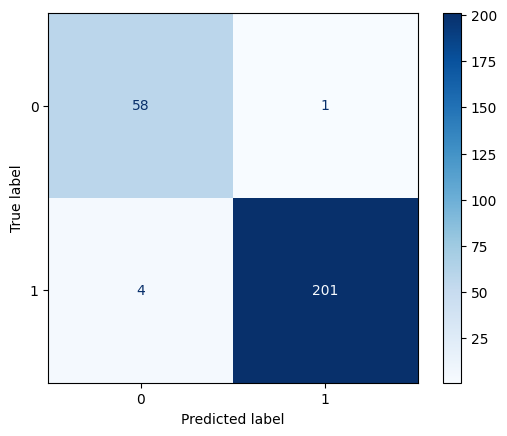

In [11]:
ConfusionMatrixDisplay(confusion_matrix=best_model_matrix).plot(cmap = plt.get_cmap('Blues'))

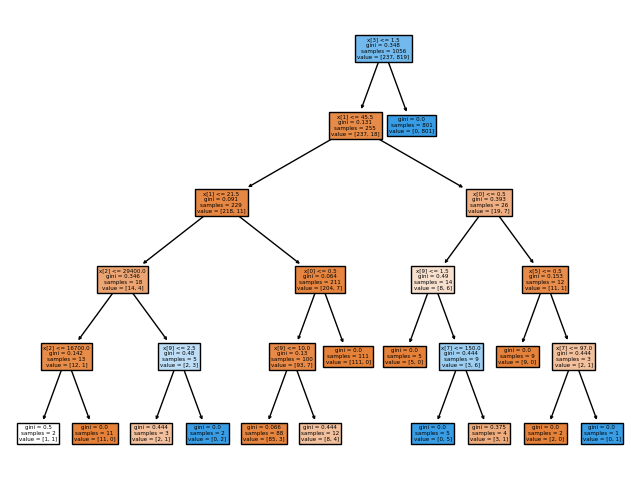

In [12]:

# Plot the Decision Tree trained above with parameters filled as True
plt.figure(figsize = (8,6))
tree.plot_tree(clf, filled = True)
plt.show()

### Save the best model

In [13]:
joblib.dump(best_model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']